In [6]:
import sys
sys.path.append('../..')
import numpy as np
import matplotlib.pyplot as plt

from scripts.NeuralNetwork.autoencoder import *

In [7]:
# name of the trained autoencoder to be uploaded
model_name = 'FN_ae_asymmetric'

# Instanciate the object
ae = Autoencoder_asymmetric(latent_dim=None,model_name=model_name)

In [8]:
# Load the test dataset
test = np.load('../../dataset/FN_testset/FN_testset_0.npz')['data'][0]
input = test[:,::2,::2,:]

# Encode and decode the data
encoded = ae.encode(input)
decoded = ae.decode(encoded)

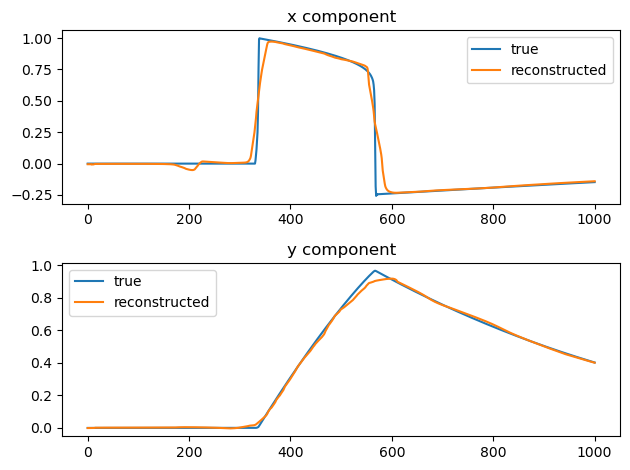

In [9]:
# Plot the test dataset vs decoded dataset

# each plot represents the the time evolution of the variables x and y for a fixed particle (x0,y0) of the grid
x0 = 2
y0 = 1

fig, ax = plt.subplots(2,1)
ax[0].plot(test[:,x0,y0,0])
ax[0].plot(decoded[:,x0,y0,0])
ax[0].set_title("x component")

ax[1].plot(test[:,x0,y0,1])
ax[1].set_title('y component')
ax[1].plot(decoded[:,x0,y0,1])

ax[0].legend(['true','reconstructed'])
ax[1].legend(['true','reconstructed'])

plt.tight_layout()
plt.show()

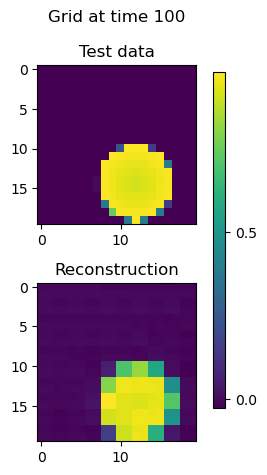

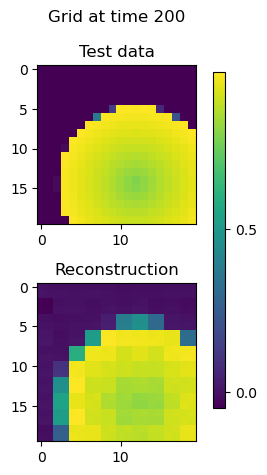

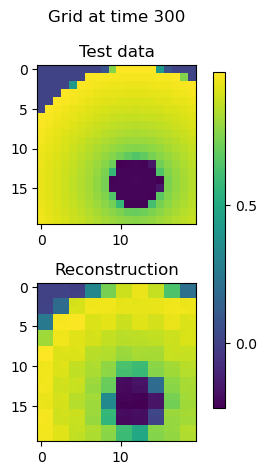

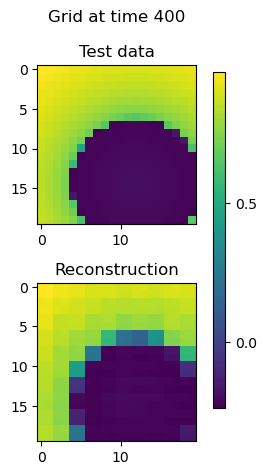

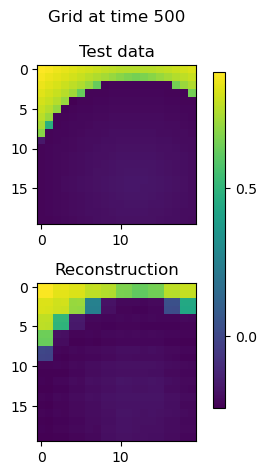

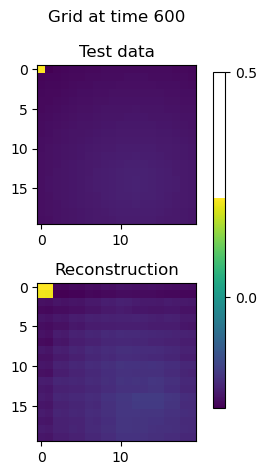

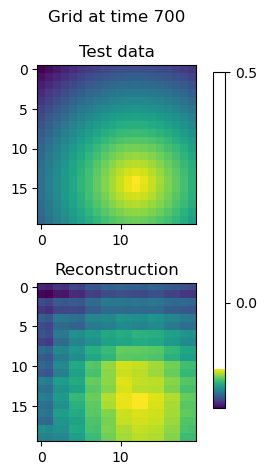

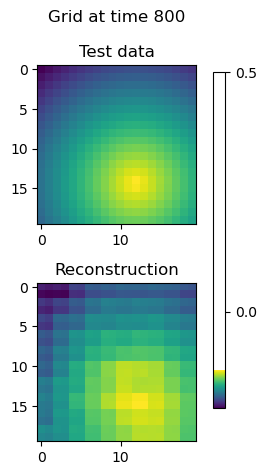

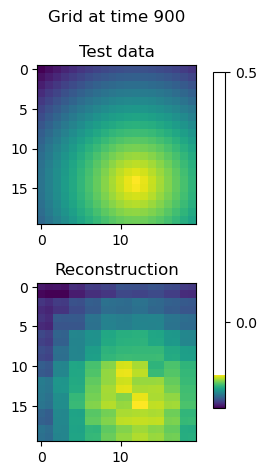

In [10]:
# Plot the test dataset vs decoded dataset

# each plot represents the entire grid at a fixed time instant t, indicated in the title of the figure 

for i in [100*i for i in range(10)]:
    if i !=0:
        fig, ax = plt.subplots(2,1)
        ax[0].imshow(test[i,:,:,0])
        ax[0].set_title("Test data")

        im = ax[1].imshow(decoded[i,:,:,0])
        ax[1].set_title("Reconstruction")

        cbar_ax = fig.add_axes([0.65, 0.15, 0.02, 0.7])
        cbar = fig.colorbar(im,cax=cbar_ax,ax=ax.ravel().tolist())
        cbar.set_ticks(np.arange(0,1,0.5))
        fig.suptitle(f"Grid at time {i}")
        plt.tight_layout()
        plt.show()